In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Importing the data
opsd_daily = pd.read_csv('Sheet-1.csv', index_col=0, parse_dates=True)
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)



,ST,ET,use[kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],...,Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],Year,Month,Weekday Name
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-08,5:00,6:00,1.646750,0.003417,1.646750,0.000033,0.490217,0.675283,0.043117,0.123583,...,0.000067,0.000017,0.031550,0.001033,0.004233,0.001667,0.003417,2017,2,Wednesday
2017-02-22,23:00,0:00,1.456000,0.003450,1.456000,0.000000,0.020267,0.063967,0.042450,0.105533,...,0.000083,0.000017,0.591933,0.001167,0.004250,0.098683,0.003450,2017,2,Wednesday
2017-03-06,8:00,9:00,0.874383,0.003400,0.874383,0.000317,0.070167,0.331383,0.050383,0.135867,...,0.000200,0.000000,0.066567,0.001033,0.004250,0.001683,0.003400,2017,3,Monday
2017-04-03,18:00,19:00,0.306050,0.003067,0.306050,0.000267,0.020717,0.062867,0.042450,0.005167,...,0.000017,0.000000,0.032017,0.001000,0.004267,0.001683,0.003067,2017,4,Monday
2017-04-03,9:00,10:00,0.693283,0.003083,0.693283,0.000233,0.051467,0.062483,0.042333,0.137967,...,0.000033,0.000017,0.031550,0.001017,0.004050,0.001617,0.003083,2017,4,Monday


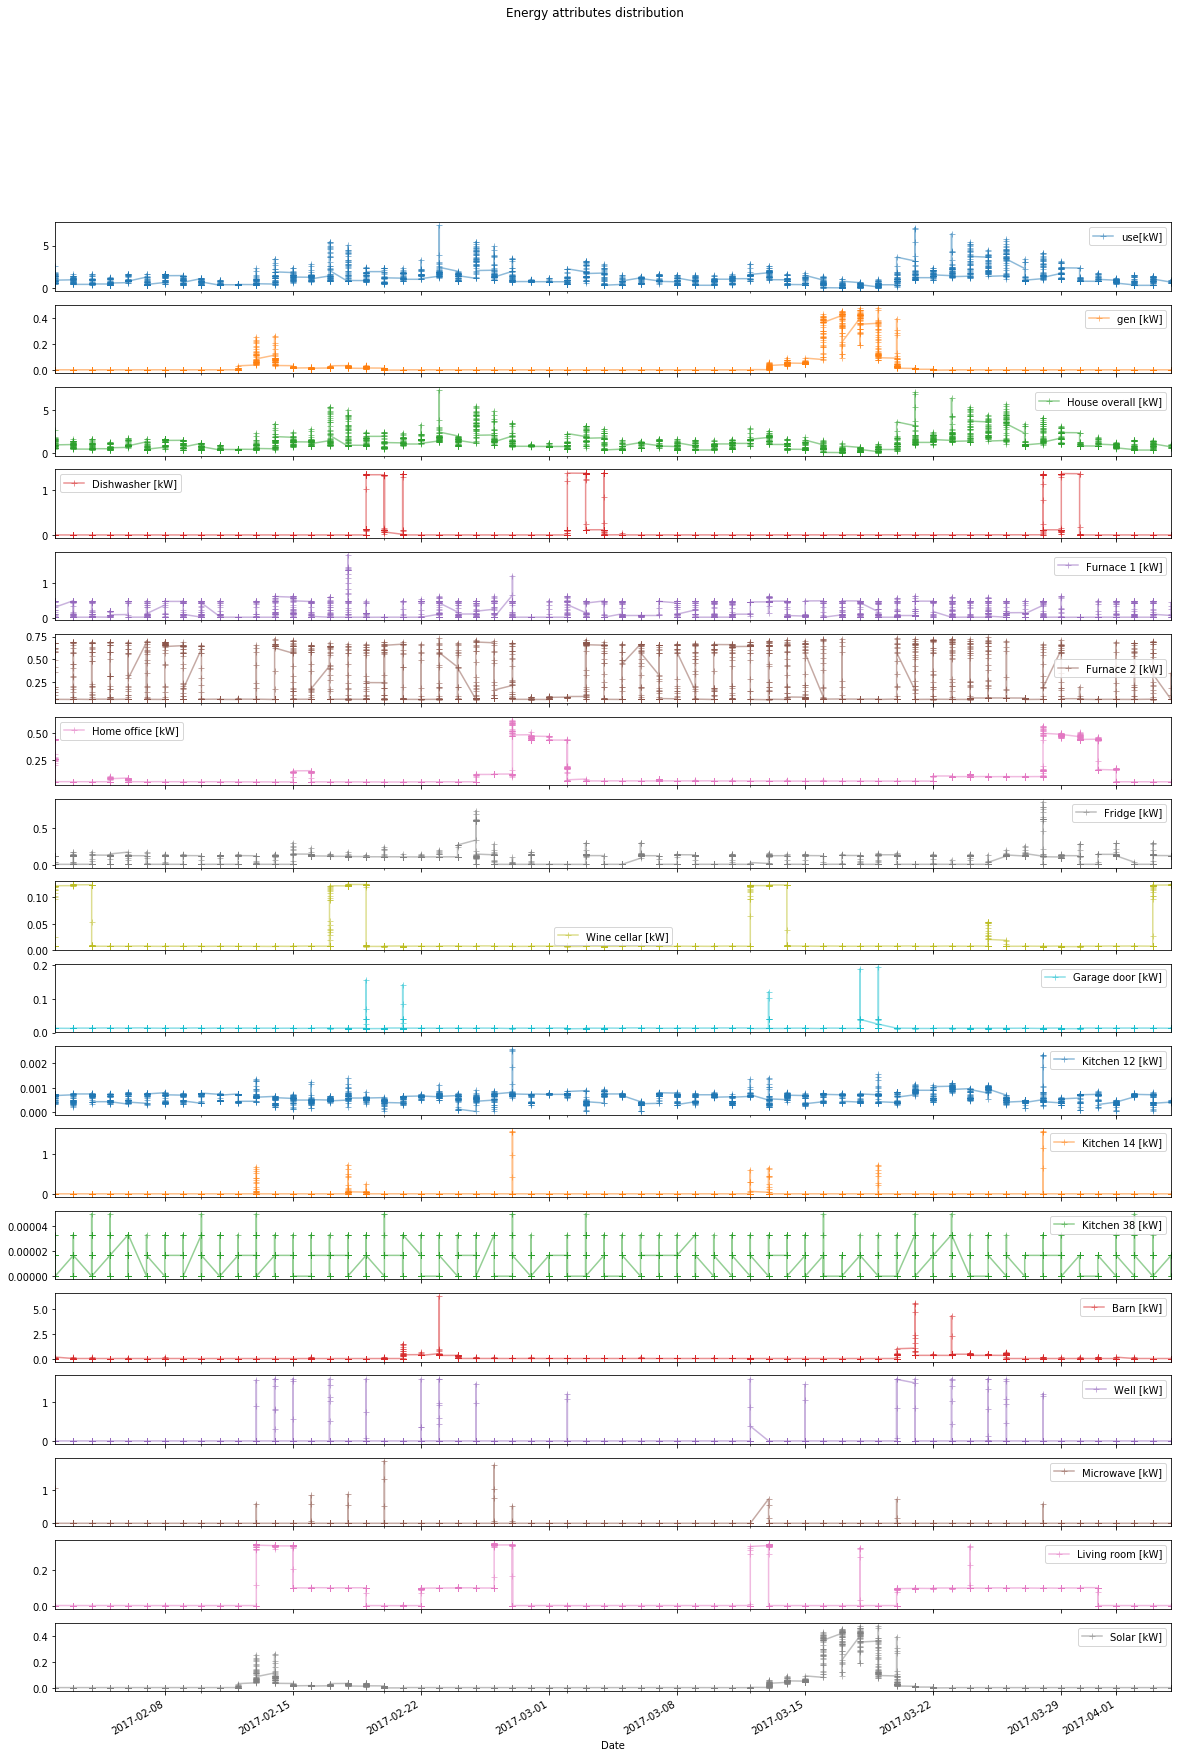

In [2]:
cols_plot = ['use[kW]','gen [kW]','House overall [kW]','Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]',
               'Fridge [kW]','Wine cellar [kW]','Garage door [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]','Barn [kW]',
               'Well [kW]','Microwave [kW]','Living room [kW]','Solar [kW]']
axes = opsd_daily[cols_plot].plot( title="Energy attributes distribution",marker='+',alpha=0.5, linestyle=None, figsize=(20,30), subplots=True)



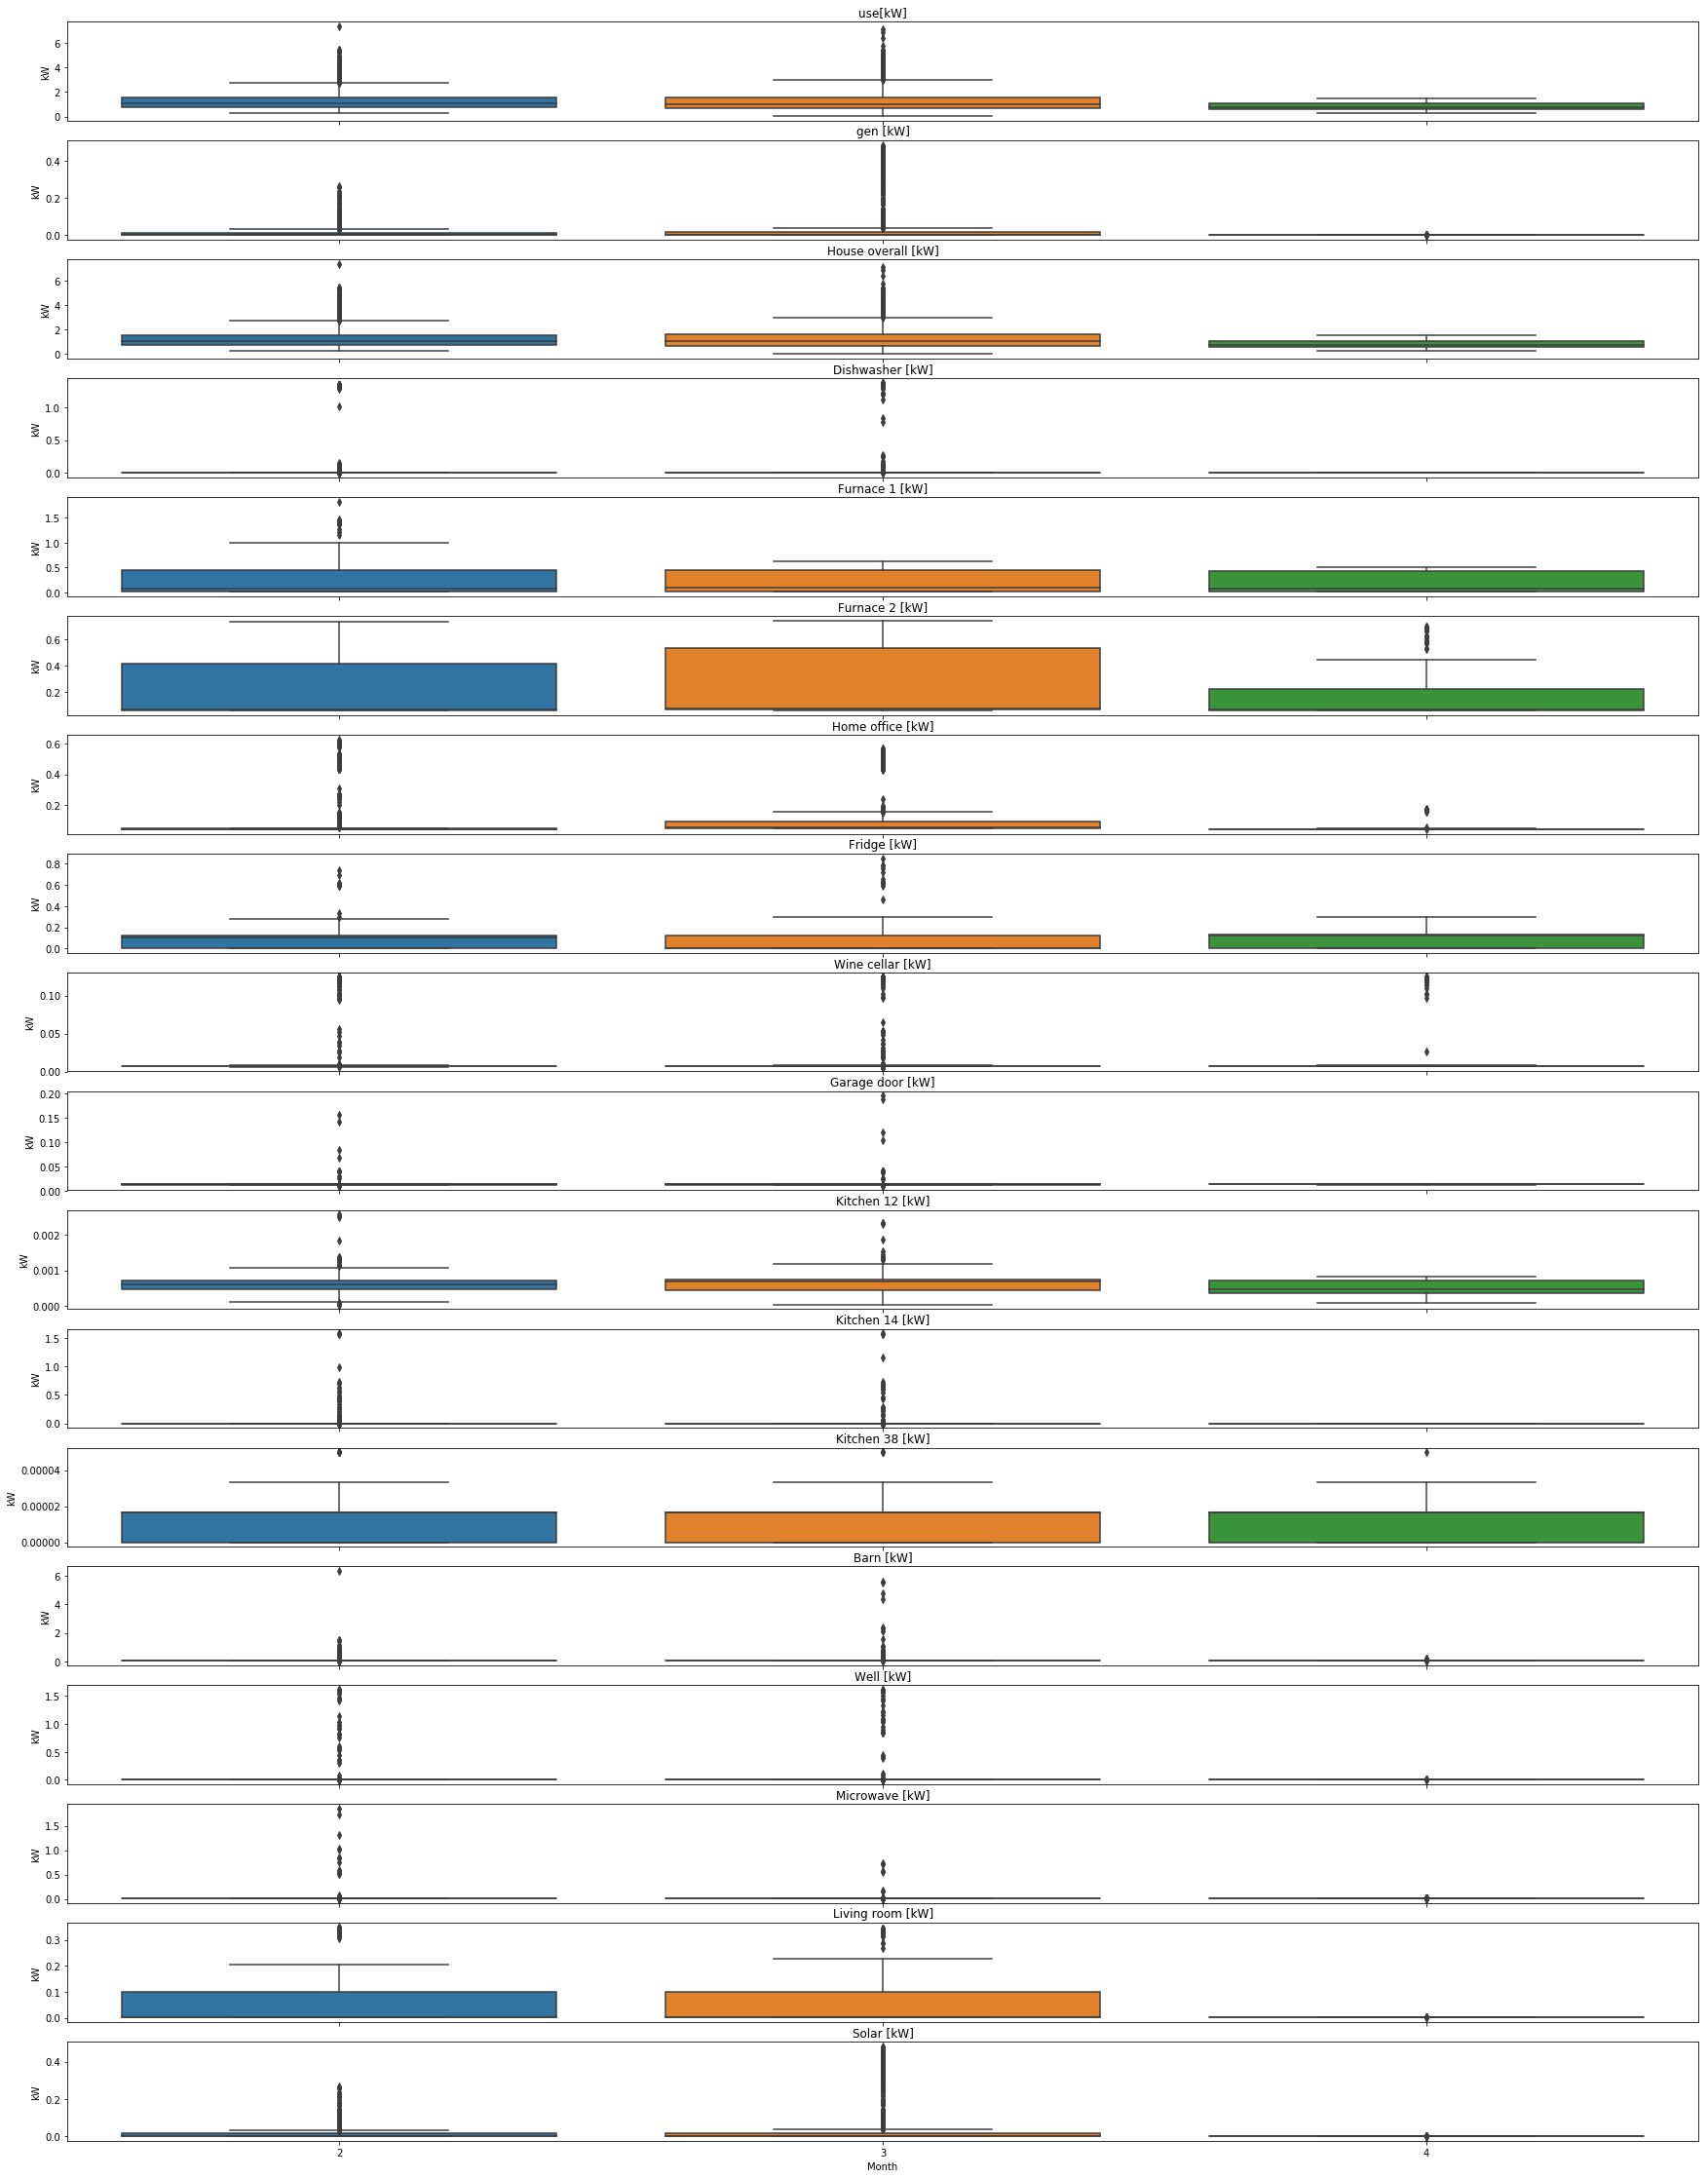

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, axes = plt.subplots(18, 1, figsize=(30,40), sharex=True)
for name, ax in zip(['use[kW]','gen [kW]','House overall [kW]','Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]',
               'Fridge [kW]','Wine cellar [kW]','Garage door [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]','Barn [kW]',
               'Well [kW]','Microwave [kW]','Living room [kW]','Solar [kW]'], axes):
   sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
   ax.set_ylabel('kW')
   ax.set_title(name)

# Remove the automatic x-axis label from all but the bottom subplot
for ax in fig.get_axes():
    ax.label_outer()

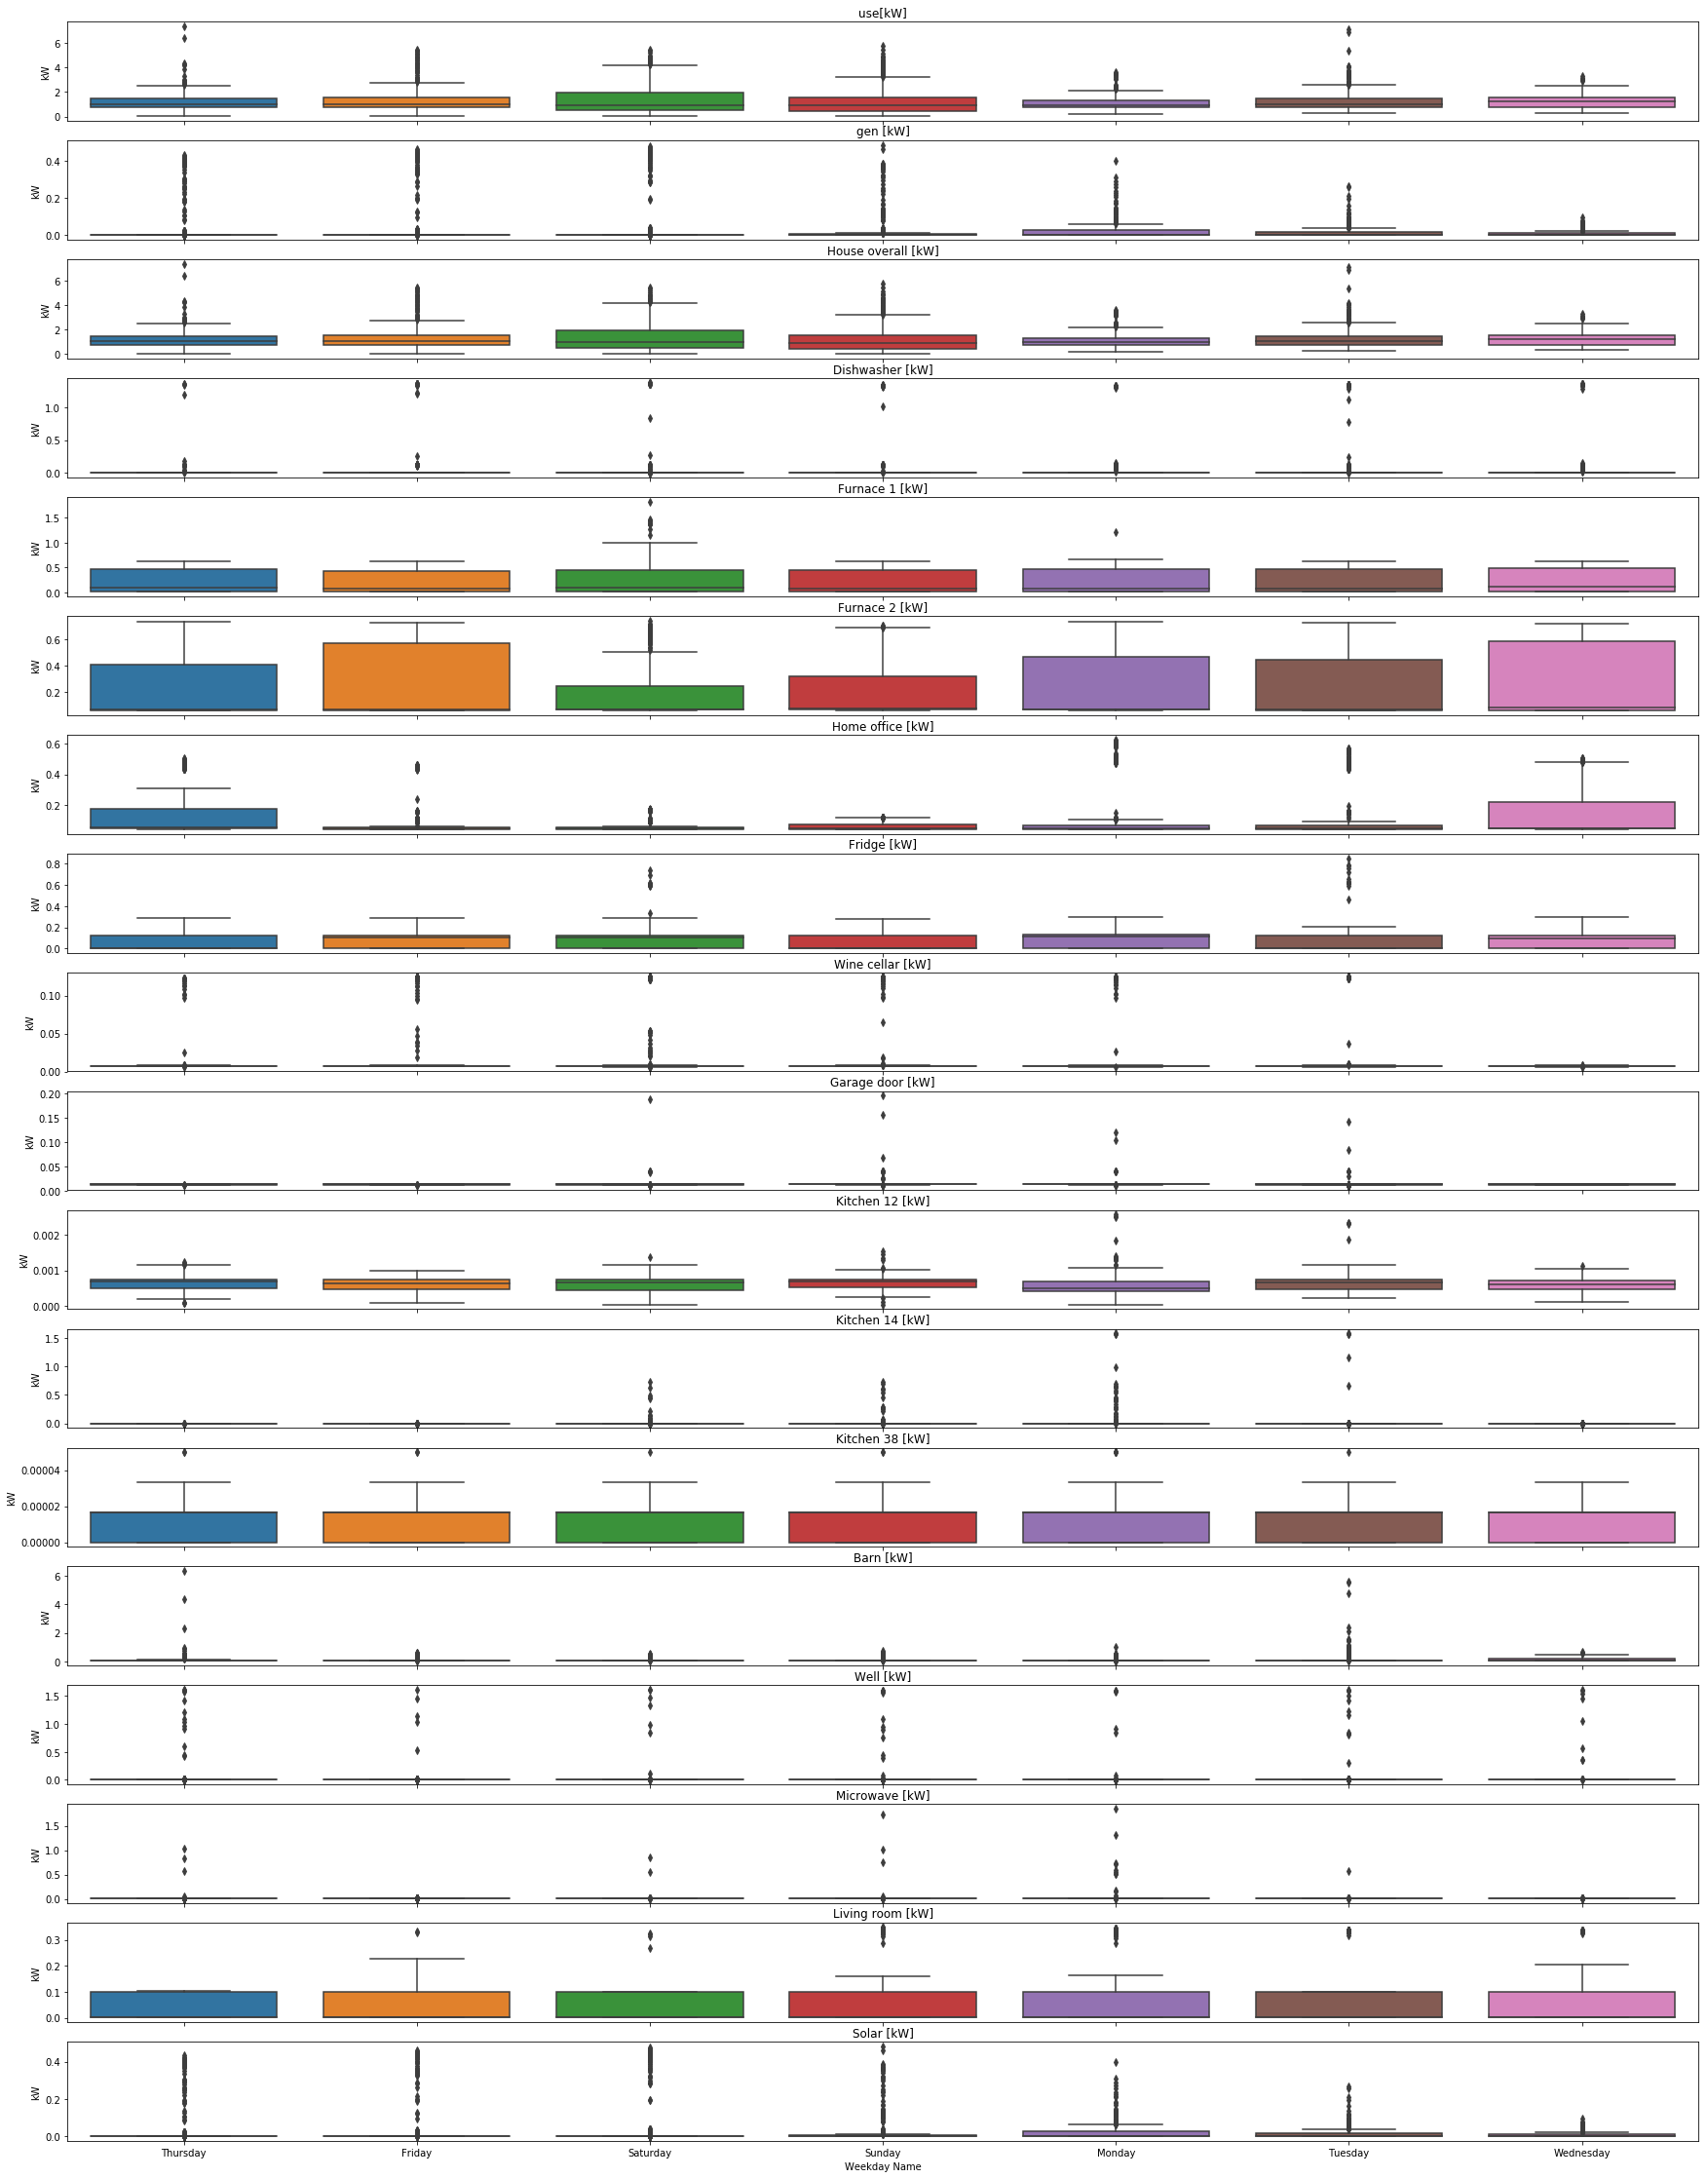

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, axes = plt.subplots(18, 1, figsize=(30,40), sharex=True)
for name, ax in zip(['use[kW]','gen [kW]','House overall [kW]','Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]',
               'Fridge [kW]','Wine cellar [kW]','Garage door [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]','Barn [kW]',
               'Well [kW]','Microwave [kW]','Living room [kW]','Solar [kW]'], axes):
   sns.boxplot(data=opsd_daily, x='Weekday Name', y=name, ax=ax)
   ax.set_ylabel('kW')
   ax.set_title(name)
   
# Remove the automatic x-axis label from all but the bottom subplot
for ax in fig.get_axes():
    ax.label_outer()

            Microwave [kW]  Living room [kW]  Solar [kW]  House overall [kW]
Date                                                                        
2017-02-05        0.009595          0.001586    0.003395            0.877211
2017-02-12        0.004241          0.001611    0.003721            0.756802
2017-02-19        0.014249          0.179779    0.043888            1.491110


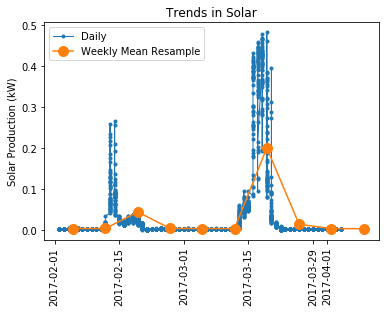

In [5]:
data_columns = ['Microwave [kW]','Living room [kW]','Solar [kW]','House overall [kW]']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
print(opsd_weekly_mean.head(3))

start, end = '02-2017', '04-2017'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end,'Solar [kW]'],
marker='.', linestyle='-', linewidth=1, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar [kW]'],
marker='o', markersize=10, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (kW)')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Trends in Solar')
ax.legend();

            Microwave [kW]  Living room [kW]  Solar [kW]  House overall [kW]
Date                                                                        
2017-02-28       17.814350         98.918867   18.628717         1675.804700
2017-03-31        9.284767         73.630717   76.322650         1941.995767
2017-04-30        0.669167          0.250950    0.484667          126.813183


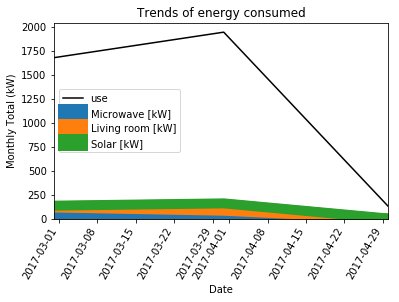

In [6]:
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
print(opsd_monthly.head(3))

fig, ax = plt.subplots()
ax.plot(opsd_monthly['House overall [kW]'], color='black', label='use')
opsd_monthly[['Microwave [kW]','Living room [kW]','Solar [kW]']].plot.area(ax=ax, linewidth=10)
ax.legend()
ax.tick_params(axis='x', rotation=60)
ax.set_title('Trends of energy consumed')
ax.set_ylabel('Monthly Total (kW)');

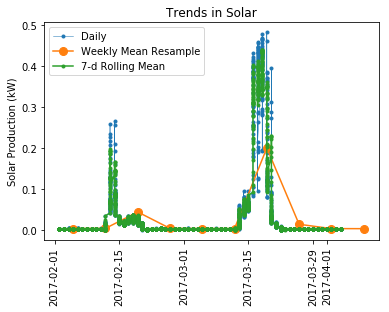

In [7]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar [kW]'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar [kW]'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar [kW]'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (kW)')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Trends in Solar')
ax.legend();

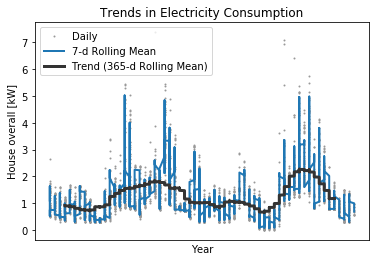

In [8]:
import matplotlib.dates as mdates
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()
fig, ax = plt.subplots()
ax.plot(opsd_daily['House overall [kW]'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['House overall [kW]'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['House overall [kW]'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('House overall [kW]')
ax.set_title('Trends in Electricity Consumption');

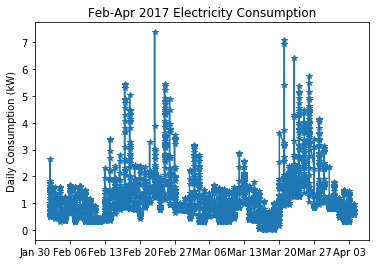

In [9]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-02':'2017-04', 'use[kW]'], marker='*', linestyle='-')
ax.set_ylabel('Daily Consumption (kW)')
ax.set_title('Feb-Apr 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Importing the data
dataset=pd.read_csv('Sheet-1.csv')
X=dataset.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values

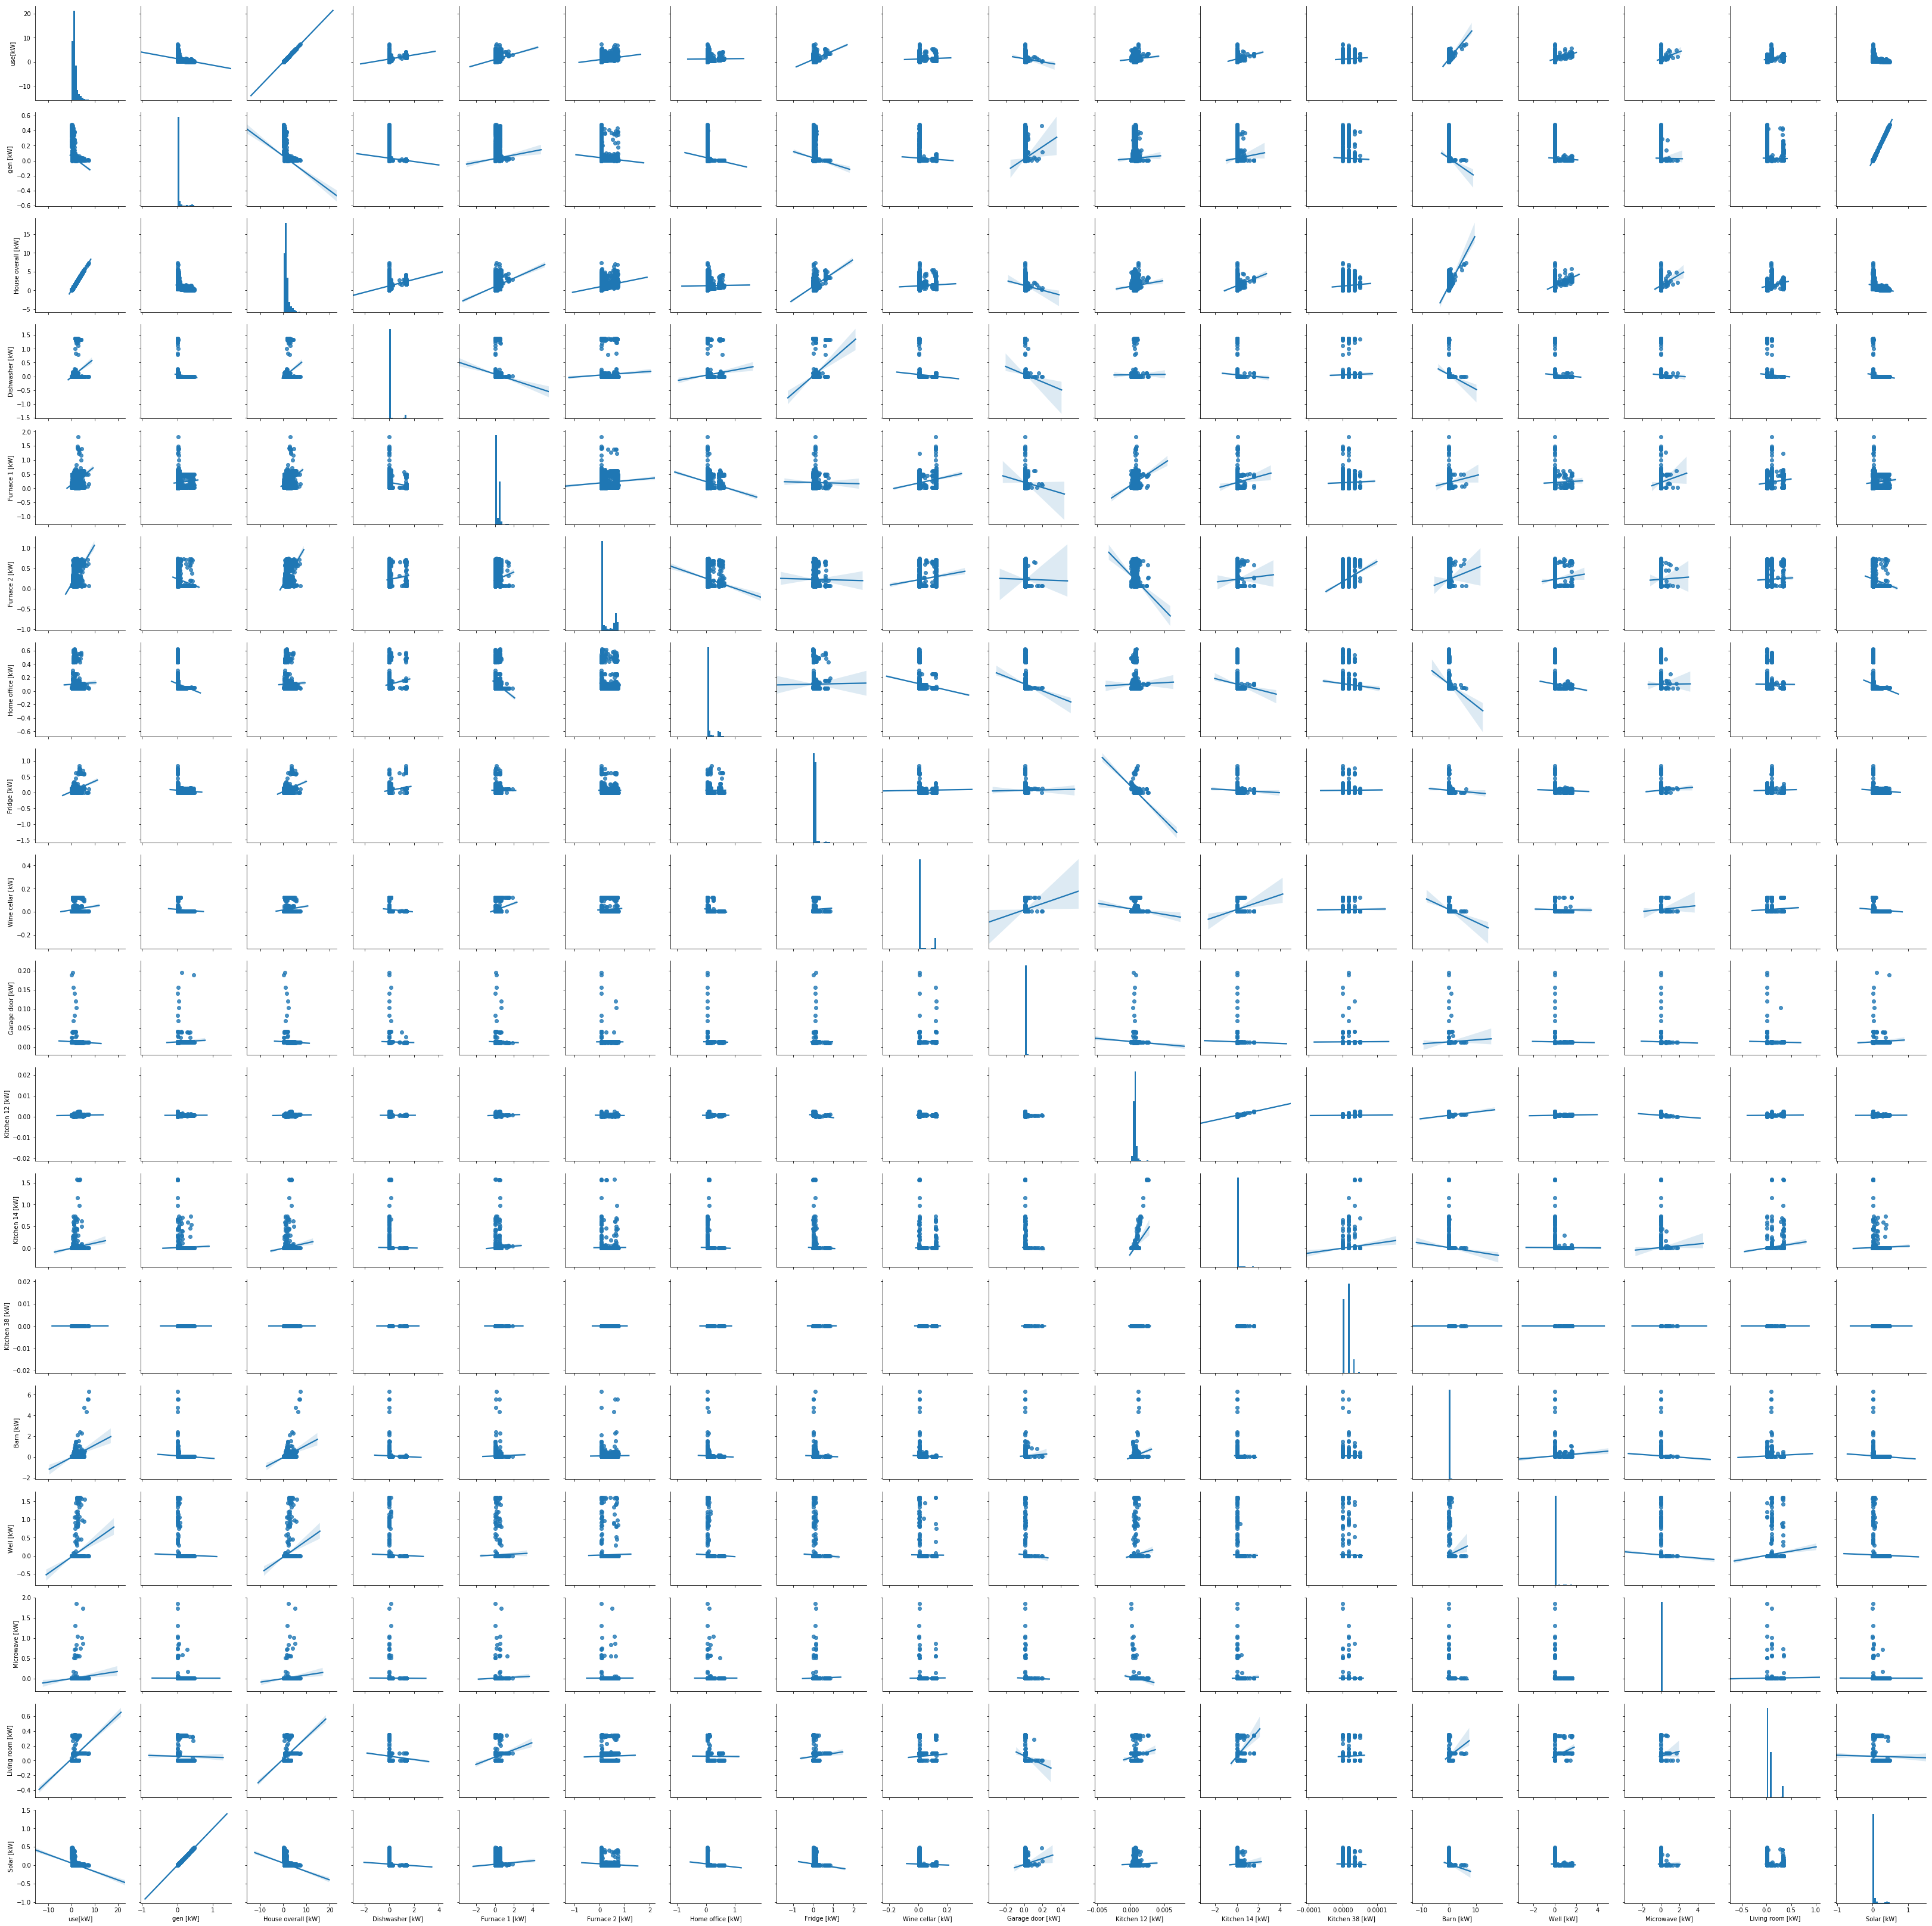

In [11]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Sheet-1.csv')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()



Text(0.5, 0.98, 'Regression between Furnance 1 and Home office')

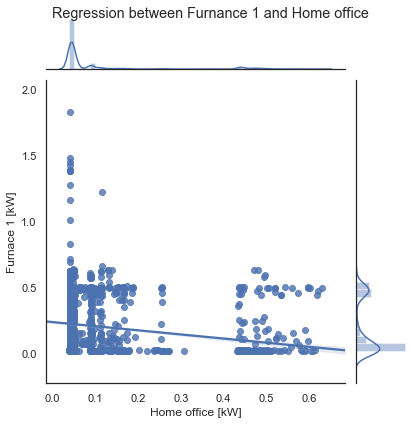

In [12]:
import numpy as np
import pandas as pd
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
dataset=pd.read_csv('Sheet-1.csv')
g=sns.jointplot("Home office [kW]","Furnace 1 [kW]", data=dataset,kind="reg")
plt.suptitle('Regression between Furnance 1 and Home office')

Text(0.5, 0.98, 'Regression between Fridge and Kitchen 14')

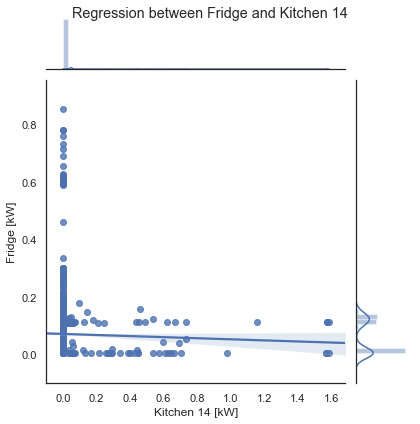

In [13]:
import numpy as np
import pandas as pd
np.random.seed(0)
import seaborn as sns
sns.set(style="white", color_codes=True)
dataset=pd.read_csv('Sheet-1.csv')
po = sns.jointplot("Kitchen 14 [kW]","Fridge [kW]", data=dataset,kind="reg")
plt.suptitle('Regression between Fridge and Kitchen 14')